In [54]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns

In [55]:
#1.将下面的字典创建为DataFrame
data = {"grammer": ["Python", "C", "Java", "GO", np.nan, "SQL", "PHP", "Python"],
        "score": [1, 2, np.nan, 4, 5, 6, 7, 10]}
df = DataFrame(data)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [56]:
#2.提取含有字符串"Python"的行
df[df['grammer'] == 'Python']

,grammer,score
0,Python,1.0
7,Python,10.0


In [57]:
#3.打印输出df的所有列名
df.columns

Index(['grammer', 'score'], dtype='object')

In [58]:
#4.修改第二列列名为’popularity’
df = df.rename(columns={'score': 'popularity'})
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [59]:
#5.统计grammer列中每种编程语言出现的次数
df['grammer'].value_counts()

grammer
Python    2
C         1
Java      1
GO        1
SQL       1
PHP       1
Name: count, dtype: int64

In [60]:
# 将空值用上下值的平均值填充 (2 + 4) / 2 = 3
df['popularity'].fillna(df['popularity'].interpolate())
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [61]:
df[df['popularity'] > 3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [62]:
#8.按照grammer列进行去除重复值
df['grammer'].drop_duplicates()

0    Python
1         C
2      Java
3        GO
4       NaN
5       SQL
6       PHP
Name: grammer, dtype: object

In [63]:
#9.计算popularity列平均值
df['popularity'].mean()

5.0

In [64]:
#10.将grammer列转换为list
li = list(df['grammer'])
li2 = df['grammer'].to_list

In [65]:
#11.将DataFrame保存为EXCEL
df.to_excel('name.xlsx')

In [66]:
#12.查看数据行列数
df.shape

(8, 2)

In [67]:
#13.提取popularity列值大于3小于7的行
df[(df['popularity'] > 3) & (df['popularity'] < 7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


In [68]:
new_col = ['popularity', 'grammer']
df[new_col]

,popularity,grammer
0,1.0,Python
1,2.0,C
2,NaN,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [69]:
#15.提取popularity列最大值所在行
max_df = df['popularity'].index.max()
max_df

7

In [70]:
#16.查看最后5行数据
df.tail(5)

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [71]:
#17.删除最后一行数据
df.drop(df.index[-1], inplace=True)  #inplace表示在原数据上进行修改

In [72]:
#18.添加一行数据[‘Perl’,6.6]
df.loc[8] = ['Perl', 6.6]

In [73]:
#19.对数据按照"popularity"列值的大小进行排序
df.sort_values(by='popularity')

,grammer,popularity
0,Python,1.0
1,C,2.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
8,Perl,6.6
6,PHP,7.0
2,Java,NaN


In [74]:
#20.统计grammer列每个字符串的长度
result_drop = df['grammer'].dropna().str.len()
list(result_drop)

[6, 1, 4, 2, 3, 3, 4]

In [75]:
#21.读取本地EXCEL数据pandas120.xlsx
df = pd.read_excel('pandas120.xlsx')
df

,createTime,education,salary
0,2020/3/16 11:30:18,本科,20k-35k
1,2020/3/16 11:30:19,本科,20k-35k
2,2020/3/16 11:30:20,不限,13k-40k
3,2020/3/16 11:30:21,本科,10k-20k
4,2020/3/16 11:30:22,本科,10k-20k
...,...,...,...
162,2020/3/16 11:30:28,本科,10k-18k
163,2020/3/16 11:30:29,硕士,30k-50k
164,2020/3/16 11:30:30,本科,20k-50k
165,2020/3/16 11:30:31,本科,15k-24k


In [76]:
#22.查看df数据前5行
df.head(5)

,createTime,education,salary
0,2020/3/16 11:30:18,本科,20k-35k
1,2020/3/16 11:30:19,本科,20k-35k
2,2020/3/16 11:30:20,不限,13k-40k
3,2020/3/16 11:30:21,本科,10k-20k
4,2020/3/16 11:30:22,本科,10k-20k


In [77]:
#23.将salary列数据转换为最大值与最小值的平均值
# 假设你的DataFrame是df，列名是'salary'
df[['min_salary', 'max_salary']] = df['salary'].str.split('-', expand=True)

# 将新生成的min_salary和max_salary列转换为数字
df['min_salary'] = df['min_salary'].str.extract('(\d+)').astype(int)
df['max_salary'] = df['max_salary'].str.extract('(\d+)').astype(int)

# df.drop(columns='salary')

df['salary'] = (df['min_salary'] + df['max_salary']) / 2

In [78]:
df['salary'] = df['salary'] * 1000
df

,createTime,education,salary,min_salary,max_salary
0,2020/3/16 11:30:18,本科,27500.0,20,35
1,2020/3/16 11:30:19,本科,27500.0,20,35
2,2020/3/16 11:30:20,不限,26500.0,13,40
3,2020/3/16 11:30:21,本科,15000.0,10,20
4,2020/3/16 11:30:22,本科,15000.0,10,20
...,...,...,...,...,...
162,2020/3/16 11:30:28,本科,14000.0,10,18
163,2020/3/16 11:30:29,硕士,40000.0,30,50
164,2020/3/16 11:30:30,本科,35000.0,20,50
165,2020/3/16 11:30:31,本科,19500.0,15,24


In [79]:
#24.将数据根据学历进行分组并计算平均薪资
education = df['education ']
df.groupby(education)['salary'].mean()

education 
不限    26181.818182
大专    20045.454545
本科    25533.613445
硕士    47233.333333
Name: salary, dtype: float64

In [80]:
#25.将createTime列时间转换为月-日的形式
df['createTime'] = pd.to_datetime(df['createTime'])
# 创建一个新列，包含月-日的形式
df['createTime'] = df['createTime'].dt.strftime('%m-%d')

In [81]:
#26.查看索引、数据类型和内存信息
df.index
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   createTime  167 non-null    object 
 1   education   167 non-null    object 
 2   salary      167 non-null    float64
 3   min_salary  167 non-null    int64  
 4   max_salary  167 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


In [82]:
#27.查看数值型列的汇总统计
df.describe()

,salary,min_salary,max_salary
count,167.000000,167.000000,167.000000
mean,27206.586826,19.682635,34.730539
std,9912.303039,8.894353,12.382186
min,14000.000000,10.000000,10.000000
25%,21500.000000,13.000000,27.000000
50%,27000.000000,20.000000,35.000000
75%,32000.000000,23.000000,40.000000
max,65000.000000,60.000000,80.000000


In [83]:
#28.新增一列categories根据salary将数据分为三组
bins = [0, 5000, 20000, 50000]
group_names = ['低', '中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels=group_names)
df

,createTime,education,salary,min_salary,max_salary,categories
0,03-16,本科,27500.0,20,35,高
1,03-16,本科,27500.0,20,35,高
2,03-16,不限,26500.0,13,40,高
3,03-16,本科,15000.0,10,20,中
4,03-16,本科,15000.0,10,20,中
...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中
163,03-16,硕士,40000.0,30,50,高
164,03-16,本科,35000.0,20,50,高
165,03-16,本科,19500.0,15,24,中


In [84]:
#29.按照salary列对数据降序排列
df.sort_values(by='salary', ascending=False)

,createTime,education,salary,min_salary,max_salary,categories
6,03-16,硕士,65000.0,50,80,NaN
109,03-16,硕士,65000.0,60,70,NaN
154,03-16,硕士,60000.0,50,70,NaN
118,03-16,本科,60000.0,50,70,NaN
31,03-16,本科,55000.0,50,60,NaN
...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中
127,03-16,本科,14000.0,10,18,中
57,03-16,本科,14000.0,10,18,中
143,03-16,本科,14000.0,10,18,中


In [85]:
#30.取出第33行数据
df.iloc[32]

createTime      03-16
education          硕士
salary        40000.0
min_salary         30
max_salary         50
categories          高
Name: 32, dtype: object

In [86]:
#31.计算salary列的中位数
df['salary'].median()

27000.0

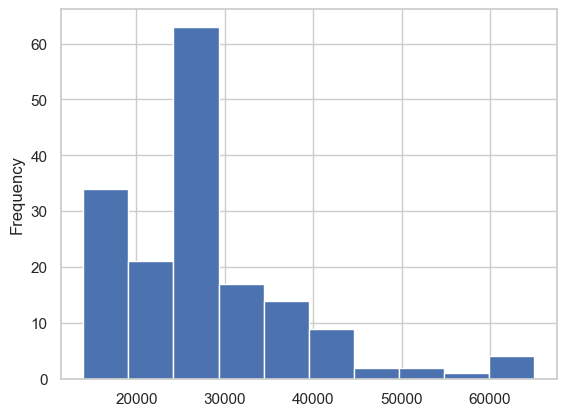

In [87]:
#32.绘制薪资水平频率分布直方图
import matplotlib.pyplot as plt

df['salary'].plot(kind='hist')
plt.show()

<Axes: xlabel='salary', ylabel='Density'>

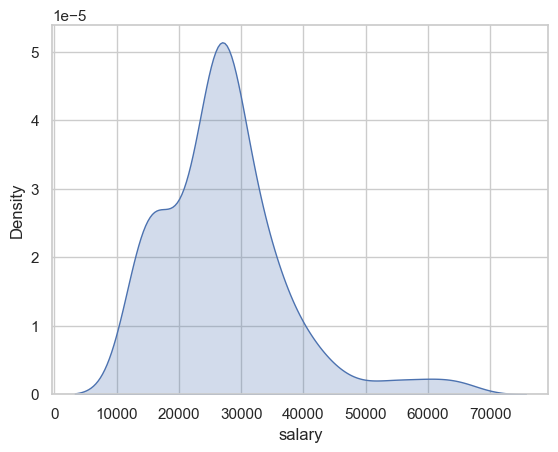

In [88]:
#33.绘制薪资水平密度曲线
sns.set(style="whitegrid")
sns.kdeplot(df['salary'], fill=True)

In [89]:
#34.删除最后一列categories
df.drop(columns='categories')

,createTime,education,salary,min_salary,max_salary
0,03-16,本科,27500.0,20,35
1,03-16,本科,27500.0,20,35
2,03-16,不限,26500.0,13,40
3,03-16,本科,15000.0,10,20
4,03-16,本科,15000.0,10,20
...,...,...,...,...,...
162,03-16,本科,14000.0,10,18
163,03-16,硕士,40000.0,30,50
164,03-16,本科,35000.0,20,50
165,03-16,本科,19500.0,15,24


In [90]:
#35.将df的第一列与第二列合并为新的一列test
df['test'] = df['createTime'] + df[('education ')]
df

,createTime,education,salary,min_salary,max_salary,categories,test
0,03-16,本科,27500.0,20,35,高,03-16本科
1,03-16,本科,27500.0,20,35,高,03-16本科
2,03-16,不限,26500.0,13,40,高,03-16不限
3,03-16,本科,15000.0,10,20,中,03-16本科
4,03-16,本科,15000.0,10,20,中,03-16本科
...,...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中,03-16本科
163,03-16,硕士,40000.0,30,50,高,03-16硕士
164,03-16,本科,35000.0,20,50,高,03-16本科
165,03-16,本科,19500.0,15,24,中,03-16本科


In [91]:
#36.将education列与salary列合并为新的一列test1
df['test1'] = df['education '] + df['salary'].astype(str)
df

,createTime,education,salary,min_salary,max_salary,categories,test,test1
0,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0
1,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0
2,03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0
3,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0
4,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0
...,...,...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0
163,03-16,硕士,40000.0,30,50,高,03-16硕士,硕士40000.0
164,03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0
165,03-16,本科,19500.0,15,24,中,03-16本科,本科19500.0


In [92]:
#37.计算salary最大值与最小值之差
df['salary'].max() - df['salary'].min()

51000.0

In [93]:
#38.将第一行与最后一行拼接
result = pd.concat([df.iloc[0], df.iloc[-1]])
result

createTime        03-16
education            本科
salary          27500.0
min_salary           20
max_salary           35
categories            高
test            03-16本科
test1         本科27500.0
createTime        03-16
education            本科
salary          32000.0
min_salary           24
max_salary           40
categories            高
test            03-16本科
test1         本科32000.0
dtype: object

In [94]:
#39.将第8行数据添加至末尾
df.iloc[-1] = df.iloc[7]
df

,createTime,education,salary,min_salary,max_salary,categories,test,test1
0,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0
1,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0
2,03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0
3,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0
4,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0
...,...,...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0
163,03-16,硕士,40000.0,30,50,高,03-16硕士,硕士40000.0
164,03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0
165,03-16,本科,19500.0,15,24,中,03-16本科,本科19500.0


In [95]:
#40.查看每列的数据类型
df.dtypes

createTime      object
education       object
salary         float64
min_salary       int64
max_salary       int64
categories    category
test            object
test1           object
dtype: object

In [96]:
#41.将createTime列设置为索引
df.set_index('createTime')

,education,salary,min_salary,max_salary,categories,test,test1
createTime,,,,,,,
03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0
03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0
03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0
03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0
03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0
...,...,...,...,...,...,...,...
03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0
03-16,硕士,40000.0,30,50,高,03-16硕士,硕士40000.0
03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0


In [147]:
#42.生成一个和df长度相同的随机数dataframe
df2 = pd.DataFrame(np.random.randn(len(df), len(df.columns)))
df2

,0,1,2,3,4,5,6,7
0,1.837301,0.168418,0.298460,2.363493,-0.522933,-1.247295,0.338935,-1.784440
1,0.961224,1.621053,-0.625166,1.215202,1.548008,0.394468,-1.383451,-0.270851
2,-0.462882,0.801353,-1.493288,-0.008547,0.132240,1.660832,-1.057661,-2.541846
3,1.929808,-0.873525,1.892211,0.431709,0.078624,0.602832,2.002304,2.993500
4,1.182408,0.284371,-1.516352,-1.025153,0.709479,0.231961,0.540420,0.447215
...,...,...,...,...,...,...,...,...
162,-0.235381,0.807631,-0.660154,-0.204252,2.273061,-0.779796,1.076339,0.791554
163,-0.474519,-0.779125,-0.292332,-1.138905,1.702824,1.187882,0.392666,0.274288
164,-0.072629,-0.920636,0.048034,-0.440606,-0.424299,-0.404818,1.401005,0.573807
165,-1.335924,-2.273181,0.593311,-0.865266,0.679874,2.674340,-1.303020,-0.878873


In [151]:
#43.将上一题生成的dataframe与df合并
df3 = pd.merge(df, df2, left_index=True, right_index=True)
df3

,createTime,education,salary,min_salary,max_salary,categories,test,test1,0,1,2,3,4,5,6,7
0,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0,1.837301,0.168418,0.298460,2.363493,-0.522933,-1.247295,0.338935,-1.784440
1,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0,0.961224,1.621053,-0.625166,1.215202,1.548008,0.394468,-1.383451,-0.270851
2,03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0,-0.462882,0.801353,-1.493288,-0.008547,0.132240,1.660832,-1.057661,-2.541846
3,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0,1.929808,-0.873525,1.892211,0.431709,0.078624,0.602832,2.002304,2.993500
4,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0,1.182408,0.284371,-1.516352,-1.025153,0.709479,0.231961,0.540420,0.447215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0,-0.235381,0.807631,-0.660154,-0.204252,2.273061,-0.779796,1.076339,0.791554
163,03-16,硕士,40000.0,30,50,高,03-16硕士,硕士40000.0,-0.474519,-0.779125,-0.292332,-1.138905,1.702824,1.187882,0.392666,0.274288
164,03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0,-0.072629,-0.920636,0.048034,-0.440606,-0.424299,-0.404818,1.401005,0.573807
165,03-16,本科,19500.0,15,24,中,03-16本科,本科19500.0,-1.335924,-2.273181,0.593311,-0.865266,0.679874,2.674340,-1.303020,-0.878873


In [157]:
#44.生成新的一列new为salary列减去之前生成随机数列
df3['new'] = df3['salary'] - df3[0]
df3

,createTime,education,salary,min_salary,max_salary,categories,test,test1,0,1,2,3,4,5,6,7,new
0,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0,1.837301,0.168418,0.298460,2.363493,-0.522933,-1.247295,0.338935,-1.784440,27498.162699
1,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0,0.961224,1.621053,-0.625166,1.215202,1.548008,0.394468,-1.383451,-0.270851,27499.038776
2,03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0,-0.462882,0.801353,-1.493288,-0.008547,0.132240,1.660832,-1.057661,-2.541846,26500.462882
3,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0,1.929808,-0.873525,1.892211,0.431709,0.078624,0.602832,2.002304,2.993500,14998.070192
4,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0,1.182408,0.284371,-1.516352,-1.025153,0.709479,0.231961,0.540420,0.447215,14998.817592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0,-0.235381,0.807631,-0.660154,-0.204252,2.273061,-0.779796,1.076339,0.791554,14000.235381
163,03-16,硕士,40000.0,30,50,高,03-16硕士,硕士40000.0,-0.474519,-0.779125,-0.292332,-1.138905,1.702824,1.187882,0.392666,0.274288,40000.474519
164,03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0,-0.072629,-0.920636,0.048034,-0.440606,-0.424299,-0.404818,1.401005,0.573807,35000.072629
165,03-16,本科,19500.0,15,24,中,03-16本科,本科19500.0,-1.335924,-2.273181,0.593311,-0.865266,0.679874,2.674340,-1.303020,-0.878873,19501.335924


In [158]:
#45.检查数据中是否含有任何缺失值
df3.isnull().any()

createTime    False
education     False
salary        False
min_salary    False
max_salary    False
categories     True
test          False
test1         False
0             False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
new           False
dtype: bool

In [159]:
#46.将salary列类型转换为浮点数
df3['salary'] = df3['salary'].astype(float)

In [170]:
#47.计算salary大于10000的次数
len(df3[df3['salary'] > 10000])

167

In [171]:
#48.查看每种学历出现的次数
df3['education '].value_counts()

education 
本科    119
不限     22
硕士     15
大专     11
Name: count, dtype: int64

In [172]:
#49.查看education列共有几种学历
df3['education '].nunique()

4

In [173]:
#50.提取salary与new列的和大于40000的最后3行
df3[(df3['salary'] + df3['new']) > 40000].tail(3)

,createTime,education,salary,min_salary,max_salary,categories,test,test1,0,1,2,3,4,5,6,7,new
159,03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0,-0.172117,-0.226067,1.125480,-0.179085,-0.884258,0.640328,1.132892,-1.202708,26500.172117
163,03-16,硕士,40000.0,30,50,高,03-16硕士,硕士40000.0,-0.474519,-0.779125,-0.292332,-1.138905,1.702824,1.187882,0.392666,0.274288,40000.474519
164,03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0,-0.072629,-0.920636,0.048034,-0.440606,-0.424299,-0.404818,1.401005,0.573807,35000.072629


In [178]:
# 51.创建serA数据：1，2，3；指定索引为a,b,c
# 创建serB数据：4，5，6；指定索引为b,c,d
# 创建serC为serA和serB相加的值
data_a = [1, 2, 3]
index_a = ['a', 'b', 'c']
serA = pd.Series(data_a, index=index_a)

data_b = [4, 5, 6]
index_b = ['b', 'c', 'd']
serB = pd.Series(data_b, index=index_b)

serC = serA.add(serB, fill_value=0)  # add() Series进行相加的方法 fill_value=0表示缺失值用0填充
serC

a    1.0
b    6.0
c    8.0
d    6.0
dtype: float64

In [181]:
#52.通过pd读取http://192.168.105.242/test.php数据创建dataframe,命名df2
df2 = pd.read_csv('http://192.168.105.242/test.php')
df2

ConnectionResetError: [Errno 54] Connection reset by peer

In [ ]:
#53.查看每一列的均值
df2.mean()

In [ ]:
#54.查看回每一列的中位数
df2.median()

In [ ]:
#55.获取行索引
df2.index

In [ ]:
#56.获取列索引
df2.columns

In [ ]:
#57.排序，index降序排
df2.sort_index(ascending=False)

In [ ]:
#58.排序, column升序排
df2.sort_index(axis=1)

In [ ]:
#59.用for循环逐行读取数据，打印输出year
for index, row in df2.iterrows():
    print(row['year'])

In [ ]:
#60.输出数据到df3.xlsx（输出包括标题和索引）
df2.to_excel('df3.xlsx')

In [ ]:
#61.创建dataframe数据df3读取自sample.csv
df3 = pd.read_csv('sample.csv')

In [ ]:
#62筛选显示前4行，StockCode列DataFrame数据
df3['StockCode'].head(4)

In [183]:
#63.筛选数据,条件:  StockCode 为 71053
df3[df3['StockCode'] == 71053]

KeyError: 'StockCode'

In [182]:
#64.筛选索引偶数行
df3.iloc[::2]

,createTime,education,salary,min_salary,max_salary,categories,test,test1,0,1,2,3,4,5,6,7,new
0,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0,1.837301,0.168418,0.298460,2.363493,-0.522933,-1.247295,0.338935,-1.784440,27498.162699
2,03-16,不限,26500.0,13,40,高,03-16不限,不限26500.0,-0.462882,0.801353,-1.493288,-0.008547,0.132240,1.660832,-1.057661,-2.541846,26500.462882
4,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0,1.182408,0.284371,-1.516352,-1.025153,0.709479,0.231961,0.540420,0.447215,14998.817592
6,03-16,硕士,65000.0,50,80,NaN,03-16硕士,硕士65000.0,-1.085995,-0.358586,-0.041343,0.101345,-0.164038,-0.945385,0.397654,0.797994,65001.085995
8,03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0,0.234043,-0.509082,-0.728211,0.557030,0.278468,0.980287,0.453009,0.208037,13999.765957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,03-16,本科,27500.0,20,35,高,03-16本科,本科27500.0,1.491075,-0.374343,-0.384661,1.547370,0.022217,-0.283190,0.095454,0.978614,27498.508925
160,03-16,本科,15000.0,10,20,中,03-16本科,本科15000.0,1.191668,-0.159282,0.904782,0.807014,2.840957,1.115137,0.573759,-0.417114,14998.808332
162,03-16,本科,14000.0,10,18,中,03-16本科,本科14000.0,-0.235381,0.807631,-0.660154,-0.204252,2.273061,-0.779796,1.076339,0.791554,14000.235381
164,03-16,本科,35000.0,20,50,高,03-16本科,本科35000.0,-0.072629,-0.920636,0.048034,-0.440606,-0.424299,-0.404818,1.401005,0.573807,35000.072629


In [186]:
#65建立数据透视表，索引index：Manager,Rep ，指定 统计value为Price,Quantity，统计方式Price为平均，Quantity为求各，统计columns为Product,显示相关产品销售情况对缺失值填充0
df_65 = pd.read_excel('sales-funnel.xlsx')
pd.pivot_table(df_65, index=['Manager', 'Rep'], values=['Price', 'Quantity'],
               aggfunc={'Price': np.mean, 'Quantity': np.sum}, columns=['Product'], fill_value=0)

Price                              Quantity  \
Product                        CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                          
Debra Henley  Craig Booker   32500        5000       0    10000        2   
              Daniel Hilton  52500           0       0    10000        4   
              John Smith     35000        5000       0        0        1   
Fred Anderson Cedric Moss    47500        5000       0    10000        3   
              Wendy Yule     82500        7000    5000        0        7   

                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

In [187]:
#66.DataFrame内连接操作，left_on='lkey',right_on='rkey'
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'lemon'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'jack'],
                    'value': [5, 6, 7, 8]})
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,bar,2,bar,6
2,baz,3,baz,7


In [188]:
#67.DataFrame左连接操作，left_on='lkey',right_on='rkey'
pd.merge(df1, df2, left_on='lkey', right_on='rkey', how='left')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5.0
1,bar,2,bar,6.0
2,baz,3,baz,7.0
3,lemon,5,NaN,NaN


In [189]:
#68.DataFrame右连接操作，left_on='lkey',right_on='rkey'
pd.merge(df1, df2, left_on='lkey', right_on='rkey', how='right')  # how表示要保留的行

,lkey,value_x,rkey,value_y
0,foo,1.0,foo,5
1,bar,2.0,bar,6
2,baz,3.0,baz,7
3,NaN,NaN,jack,8


In [ ]:
#69.计算不同公司员工的平均年龄和平均薪水
data = pd.read_csv('groupby.csv')
data.groupby('Company').mean()

In [ ]:
#70.计算不同公司员工的平均年龄和平均薪水
data.groupby('Company').agg({'Age': np.mean, 'Salary': np.mean})  # agg用于聚合

In [ ]:
#71. 计算不同公司员工的平均年龄以及薪水的中位数
data.groupby('Company').agg({'Age': np.mean, 'Salary': np.median})

In [ ]:
#72.计算不同公司员工的平均年龄以及薪水的中位数，均值，总人数
data.groupby('Company').agg({'Age': np.mean, 'Salary': np.median, 'Name': np.size})

In [193]:
#73.  对city分组，对val进行不包含NaN值和包含NaN值分别进行计数，并统计人员数量（name不重复计数）
df_c = pd.DataFrame({"Name": ["Alice", "Bob", "Mallory", "Mallory", "Bob", "Mallory"],
                     "City": ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"],
                     "Val": [4, 3, 3, np.nan, np.nan, 4]})
df_c.groupby('City')['Val'].agg([np.size, np.count_nonzero])
# 统计每个城市中不重复的 'Name' 的人员数量
result['count_unique_names'] = df_c.groupby('City')['Name'].nunique()

# 重命名列名
result.columns = ['count_val_notna', 'count_val_withna', 'count_unique_names']
df_c

,Name,City,Val
0,Alice,Seattle,4.0
1,Bob,Seattle,3.0
2,Mallory,Portland,3.0
3,Mallory,Seattle,NaN
4,Bob,Seattle,NaN
5,Mallory,Portland,4.0


In [196]:
#74.把data 的 gender做替换， 男  --> 1，女  --> 0，其它值NaN
data = pd.read_csv('map.csv')
data['gender'].replace(['男', '女'], [1, 0], inplace=True)
data

,height,weight,smoker,gender,age,color
0,178,52,False,-,89,black
1,182,55,False,0,81,white
2,169,64,False,0,26,yellow
3,189,73,False,1,63,yellow
4,177,80,False,0,75,white
...,...,...,...,...,...,...
95,168,48,True,1,22,yellow
96,185,80,True,0,49,yellow
97,159,82,True,0,40,white
98,154,59,False,1,16,white


In [198]:
#75.把df中的F替换为0,其它值保持不变
df = pd.DataFrame(
    {
        '名称': ['产品1', '产品2', '产品3', '产品4', '产品5'],
        '金额': [0, 0.48, 'F', 0.74, 0],
        '合计': [0.37, 0.28, 'C', 0.57, 0.06],
    }
)
df.replace('F', 0, inplace=True)
df

,名称,金额,合计
0,产品1,0.00,0.37
1,产品2,0.48,0.28
2,产品3,0.00,C
3,产品4,0.74,0.57
4,产品5,0.00,0.06


In [204]:
#76.对s成绩进行分箱并打标，分箱中0-60（不含）打标为不合格，60-70（不含）为合格，70-80良好，80-90为优秀，打标结果生成一列range
score = np.random.randint(25, 100, size=20)
s = pd.DataFrame(score, columns=['score'])
# 定义分箱的边界
bins = [0, 60, 70, 80, 90, 100]

# 定义对应的标签
labels = ['不合格', '合格', '良好', '优秀', '满分']

# 使用 pd.cut 进行分箱并打标
s['range'] = pd.cut(s['score'], bins=bins, labels=labels, right=False)  # right表示右边为闭区间
s

,score,range
0,34,不合格
1,41,不合格
2,81,优秀
3,99,满分
4,33,不合格
5,64,合格
6,64,合格
7,38,不合格
8,91,满分
9,96,满分


In [205]:
#77.对s各成绩段数量进行统计
s['range'].value_counts()

range
不合格    11
满分      4
合格      2
良好      2
优秀      1
Name: count, dtype: int64

In [207]:
#78.增加一列total_score，如果民族不是汉族，则在score分数上加10分，不然值就是score
df = pd.read_csv('apply.csv')


def add_score(x):
    if x['nation'] != '汉族':
        return x['score'] + 10
    else:
        return x['score']


df['total_score'] = df.apply(add_score, axis=1)
df

,name,nation,score,date_from,date_to,total_score
0,张宇,汉族,600,2019-04-01,2019-04-10,600
1,陈林,汉族,650,2019-05-20,2019-05-31,650
2,刘冬,回族,560,2019-05-01,2019-05-02,570


In [209]:
#79.增加一列interval，值为date_from到date_to的间隔天数
import pandas as pd

# 假设 'apply.csv' 包含 'date_from' 和 'date_to' 列
df = pd.read_csv('apply.csv')

# 将 'date_from' 和 'date_to' 转换为日期对象
df['date_from'] = pd.to_datetime(df['date_from'])
df['date_to'] = pd.to_datetime(df['date_to'])

# 计算两列之间的间隔天数，创建新列 'interval'
df['interval'] = (df['date_to'] - df['date_from']).dt.days
df

,name,nation,score,date_from,date_to,interval
0,张宇,汉族,600,2019-04-01,2019-04-10,9
1,陈林,汉族,650,2019-05-20,2019-05-31,11
2,刘冬,回族,560,2019-05-01,2019-05-02,1


In [ ]:
#80.增加一列label,如果score >=600 且 interval<=15 则打个标签 --> 1,否则为 0
df['label'] = df.apply(lambda x: 1 if x['score'] >= 600 and x['interval'] <= 15 else 0, axis=1)

In [211]:
#81.将列名 num --> age将索引 0-3 --> A-D
data = {'company': ['B', 'A', 'B', 'B'],
        'gender': ['female', 'female', 'male', 'male'],
        'num': [40, 31, 28, 28]}
df = pd.DataFrame(data)
df.rename(columns={'num': 'age'}, index={0: 'A', 1: 'B', 2: 'C', 3: 'D'}, inplace=True)
df

,company,gender,age
A,B,female,40
B,A,female,31
C,B,male,28
D,B,male,28


In [212]:
#82.清除company重复值, 保留最后那条记录。
df.drop_duplicates(subset=['company'], keep='last', inplace=True)

In [ ]:
#83.删除第一行和age列
df.drop(index='A', columns='age', inplace=True)

In [213]:
#84.筛选gender为female的记录。
female_records = df[df['gender'] == 'female']
female_records

,company,gender,age
B,A,female,31


In [214]:
#85.筛选出company为NaN的记录
data = {'company': ['B', 'A', 'B', np.nan],
        'gender': ['female', 'female', 'male', 'male'],
        'age': [40, 31, np.nan, 28]}
df = pd.DataFrame(data)
df[df['company'].isnull()]

,company,gender,age
3,NaN,male,28.0


In [215]:
#86.填充age缺失的数据， 值采用age前后年龄记录的平均值
df.age.fillna((df.age.shift() + df.age.shift(-1)) / 2, inplace=True)  #shift()表示向下移动一行

In [302]:
# 读文件“600132.csv”中的股票数据，利用Python和Matplotlib绘制2020年9月收盘价线型图，为每个数据点加标识“*”
import matplotlib.pyplot as plt

df_plt = pd.read_csv('600132.csv')  # parse_dates=True表示将日期转换为日期格式
df_plt['Date'] = pd.to_datetime(df_plt['Date'])
df_plt

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-09-01,92.190002,88.290001,91.599998,91.779999,3083999,91.779999
1,2020-09-02,93.379997,90.290001,92.000000,92.459999,2568645,92.459999
2,2020-09-03,94.809998,90.150002,92.550003,91.290001,3335166,91.290001
3,2020-09-04,90.989998,86.930000,90.290001,87.870003,4285280,87.870003
4,2020-09-07,88.900002,84.300003,88.040001,85.000000,4511719,85.000000
5,2020-09-08,87.180000,83.599998,86.320000,85.620003,3740871,85.620003
6,2020-09-09,86.820000,82.680000,86.000000,83.290001,3306328,83.290001
7,2020-09-10,87.879997,83.169998,84.790001,86.010002,3891146,86.010002
8,2020-09-11,90.290001,85.220001,85.690002,89.300003,2904152,89.300003
9,2020-09-14,98.230003,94.080002,96.000000,98.230003,2084249,98.230003


<Figure size 8000x8000 with 0 Axes>

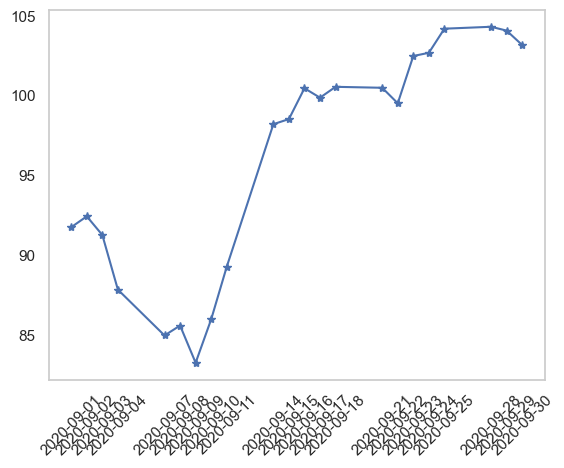

<Figure size 8000x8000 with 0 Axes>

In [310]:
df_plt = df_plt[(df_plt['Date'] >= '2020-09-01') & (df_plt['Date'] <= '2020-09-30')]
plt.plot(df_plt['Date'], df_plt['Close'], marker='*', color='b')
plt.grid(False)
plt.xticks(df_plt['Date'],rotation=45)  # Rotate and adjust alignment
plt.figure(figsize=(100, 100), dpi=80)

([<matplotlib.axis.XTick at 0x3aeed5090>,
 [Text(18506.0, 0, '2020-09-01'),
  Text(18507.0, 0, '2020-09-02'),
  Text(18508.0, 0, '2020-09-03'),
  Text(18509.0, 0, '2020-09-04'),
  Text(18512.0, 0, '2020-09-07'),
  Text(18513.0, 0, '2020-09-08'),
  Text(18514.0, 0, '2020-09-09'),
  Text(18515.0, 0, '2020-09-10'),
  Text(18516.0, 0, '2020-09-11'),
  Text(18519.0, 0, '2020-09-14'),
  Text(18520.0, 0, '2020-09-15'),
  Text(18521.0, 0, '2020-09-16'),
  Text(18522.0, 0, '2020-09-17'),
  Text(18523.0, 0, '2020-09-18'),
  Text(18526.0, 0, '2020-09-21'),
  Text(18527.0, 0, '2020-09-22'),
  Text(18528.0, 0, '2020-09-23'),
  Text(18529.0, 0, '2020-09-24'),
  Text(18530.0, 0, '2020-09-25'),
  Text(18533.0, 0, '2020-09-28'),
  Text(18534.0, 0, '2020-09-29'),
  Text(18535.0, 0, '2020-09-30')])

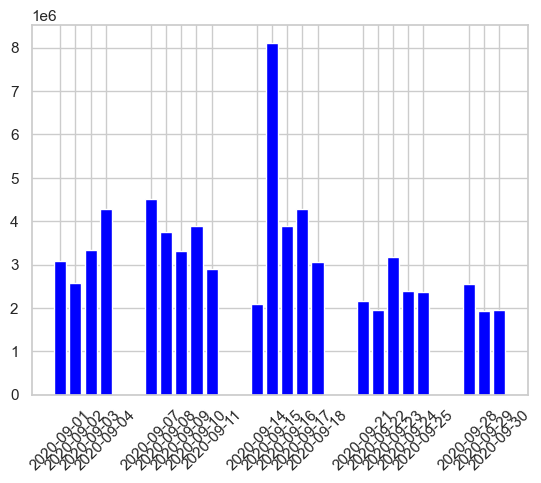

In [311]:
# 绘制每天成交量的柱形图
# 绘制柱形图
plt.bar(df_plt['Date'], df_plt['Volume'], color='blue')
plt.xticks(df_plt['Date'],rotation=45)  # 旋转 x 轴标签以提高可读性

Text(0.5, 0, '')

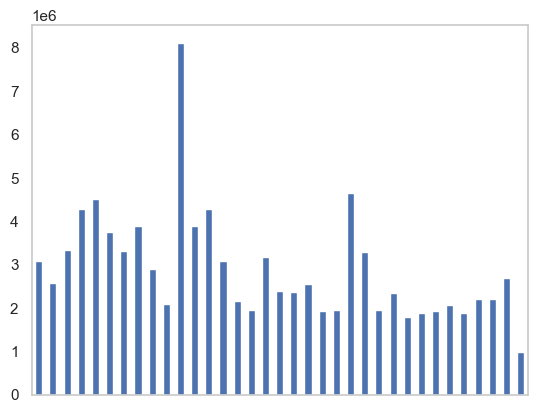

In [342]:
# Pandas是专门用于数据分析的库，其提供的read_csv()方法可以方便的读取csv格式的文件中的数据到Pandas中的DataFrame中。
df_plt = pd.read_csv('600132.csv')
df_plt.plot(x = 'Date', y = 'Volume', kind='bar', legend='')
plt.xticks([])
plt.grid(False)
plt.xlabel('')